In [1]:
import pandas as pd
import numpy as np
import os

folder_path = 'shell_script_results/'

combined_data = pd.DataFrame()

for dirpath, dirnames, filenames in os.walk(folder_path):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        # Check if the item is a file and ends with '.txt'
        if os.path.isfile(file_path) and filename.endswith('.txt'):
            # Read the text file into a DataFrame
            df = pd.read_csv(file_path, sep=';', header=None)
            # Concatenate the current DataFrame with the combined_data
            combined_data = pd.concat([combined_data, df], axis=1, ignore_index=True)

combined_data.shape
dataset = combined_data.to_numpy()

dataset = np.reshape(dataset, (3,-1,18))
dataset.shape


(3, 77, 18)

In [2]:
successful_counts = np.zeros(dataset.shape[-1])
for data in dataset[2]:
    for i in range(len(data)):
        if data[i] == 1:
            successful_counts[i] += 1
successful_counts

array([33., 54., 61., 56., 63., 59., 55., 57., 55., 52., 57., 51., 48.,
       49., 47., 45., 40., 26.])

In [3]:
average_times = np.zeros(dataset.shape[-1])
for data in dataset[0]:
    for i in range(len(data)):
        if str(data[i]) != 'nan':
            average_times[i] += (data[i]/dataset.shape[1])
        else:
            average_times[i] += (2000/dataset.shape[1])
average_times

array([  17.61038961,  574.16883117,  764.85714286,  933.22077922,
       1038.45454545, 1140.64935065, 1247.92207792, 1335.96103896,
       1405.90909091, 1480.37662338, 1552.05194805, 1617.83116883,
       1683.12987013, 1735.28571429, 1791.        , 1848.72727273,
       1900.45454545, 1936.75324675])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


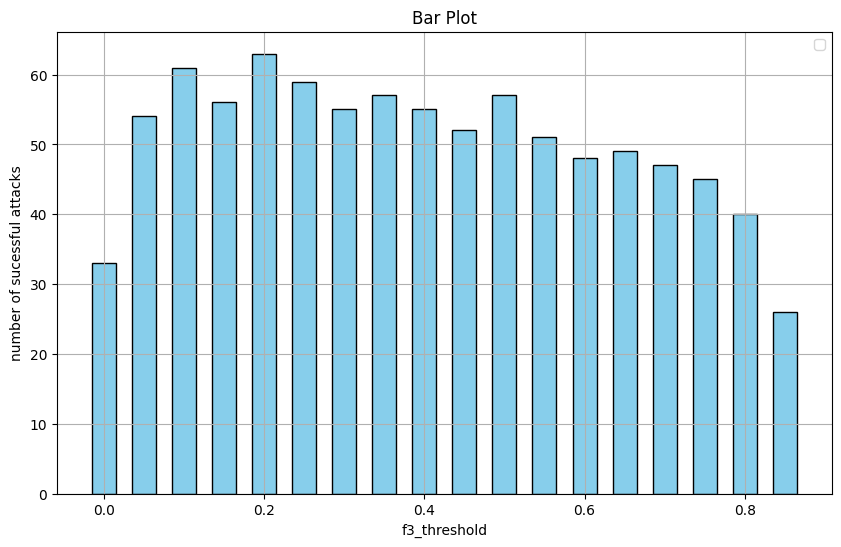

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.bar(np.arange(0, 0.9, 0.05), successful_counts, width=bar_width, color='skyblue', edgecolor='black')

plt.title('Bar Plot')
plt.xlabel('f3_threshold')
plt.ylabel('number of sucessful attacks')
plt.legend()
plt.savefig("01_f3_threshold_varying_success.png")

Text(0, 0.5, 'average time of attacks')

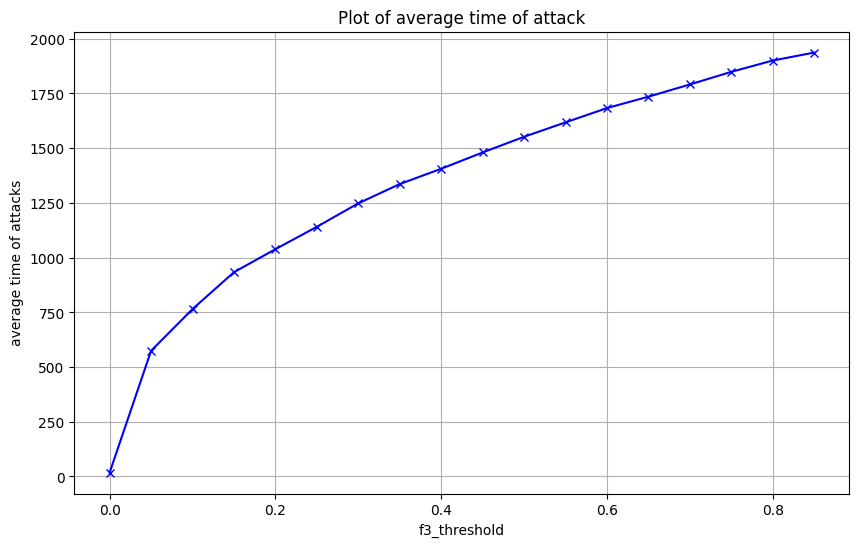

In [5]:
plt.figure(figsize=(10, 6))

plt.grid(True)
bar_width = 0.03  # Adjust the width of the bars
plt.plot(np.arange(0, 0.9, 0.05), average_times, color='blue',marker='x')

plt.title('Plot of average time of attack')
plt.xlabel('f3_threshold')
plt.ylabel('average time of attacks')